## 1. Pré-processamento e Exploração Inicial/Data Preprocessing and Initial Exploration

This dataset is a synthetic but realistic collection of 32,424 individual financial records, representing real-world personal finance behaviors across income groups, regions, and loan statuses. It is ideal for EDA, financial modeling, credit risk prediction, and machine learning tasks.

Este conjunto de dados é uma coleção sintética, porém realista, de 32.424 registros financeiros individuais, representando comportamentos de finanças pessoais do mundo real em diferentes grupos de renda, regiões e status de empréstimo




| **Column Name**              | **Description (English)**                                      | **Descrição (Português)**                                      |
|------------------------------|---------------------------------------------------------------|---------------------------------------------------------------|
| **user_id**                  | Unique user identifier                                        | Identificador único do usuário                                |
| **age**                      | Age of individual (18–70)                                     | Idade do indivíduo (18–70)                                    |
| **gender**                   | Gender (Male/Female/Other)                                    | Gênero (Masculino/Feminino/Outro)                             |
| **education_level**          | Highest education level                                       | Nível mais alto de escolaridade                               |
| **employment_status**        | Employment type (e.g., Employed, Student)                     | Situação de emprego (ex: Empregado, Estudante)                |
| **job_title**                | Job title or role                                             | Cargo ou função profissional                                  |
| **monthly_income_usd**       | Approx. monthly income in USD                                 | Renda mensal aproximada em USD                                |
| **monthly_expenses_usd**     | Approx. monthly expenses in USD                               | Gastos mensais aproximados em USD                             |
| **savings_usd**              | Total savings                                                 | Total de economias/savings                                    |
| **has_loan**                 | Whether individual has a loan (Yes/No)                        | Indica se a pessoa tem empréstimo (Sim/Não)                   |
| **loan_type**                | Type of loan (if any)                                         | Tipo de empréstimo (se aplicável)                             |
| **loan_amount_usd**          | Loan principal amount                                         | Valor principal do empréstimo                                 |
| **loan_term_months**         | Duration of loan                                              | Prazo do empréstimo em meses                                  |
| **monthly_emi_usd**          | Monthly installment (EMI)                                     | Prestação mensal (EMI)                                        |
| **loan_interest_rate_pct**   | Interest rate on loan (%)                                     | Taxa de juros do empréstimo (%)                               |
| **debt_to_income_ratio**     | Ratio of debt payments to income                              | Proporção dívida/renda                                        |
| **credit_score**             | Synthetic credit score (300–850)                              | Pontuação de crédito sintética (300–850)                      |
| **savings_to_income_ratio**  | Ratio of savings to annual income                             | Proporção entre economias e renda anual                       |
| **region**                   | Geographic region                                             | Região geográfica                                             |
| **record_date**              | Record creation date                                          | Data de criação do registro                                   |

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import chi2_contingency
from scipy import stats

c:\Users\rober\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
file_path = "../artifacts/synthetic_personal_finance_dataset.csv"
df = pd.read_csv(file_path)
df.shape

(32424, 20)

In [4]:
df.isnull().sum()

user_id                        0
age                            0
gender                         0
education_level                0
employment_status              0
job_title                      0
monthly_income_usd             0
monthly_expenses_usd           0
savings_usd                    0
has_loan                       0
loan_type                  19429
loan_amount_usd                0
loan_term_months               0
monthly_emi_usd                0
loan_interest_rate_pct         0
debt_to_income_ratio           0
credit_score                   0
savings_to_income_ratio        0
region                         0
record_date                    0
dtype: int64

In [5]:
# Solução provisória - criar categoria 'None' para quem não tem empréstimo
df['loan_type'] = df['loan_type'].fillna('None')

In [6]:
df_cols = df.copy()


categorical_cols = ['gender', 'education_level', 'employment_status', 'job_title', 'has_loan', 'loan_type', 'region']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_cols[col].value_counts(normalize=True))


gender:
gender
Male      0.480971
Female    0.479583
Other     0.039446
Name: proportion, dtype: float64

education_level:
education_level
Bachelor       0.402110
Master         0.298328
High School    0.199112
PhD            0.050518
Other          0.049932
Name: proportion, dtype: float64

employment_status:
employment_status
Employed         0.598631
Self-employed    0.202936
Unemployed       0.099309
Student          0.099124
Name: proportion, dtype: float64

job_title:
job_title
Driver         0.114051
Teacher        0.113311
Manager        0.111677
Student        0.111306
Unemployed     0.111214
Accountant     0.110751
Salesperson    0.110011
Doctor         0.109610
Engineer       0.108068
Name: proportion, dtype: float64

has_loan:
has_loan
No     0.599217
Yes    0.400783
Name: proportion, dtype: float64

loan_type:
loan_type
None         0.599217
Home         0.101283
Education    0.101005
Business     0.100574
Car          0.097921
Name: proportion, dtype: float64

region:
re

Observações;

Gênero (gender):

*  Distribuição equilibrada entre Masculino (48.1%) e Feminino (48.0%)
*  Outros gêneros representam 3.9% (importante manter essa categoria para inclusividade)

Nível Educacional:

*  Predominância de Bacharéis (40.2%) e Mestres (29.8%)
*  Ensino Médio completo representa 19.9%
*  PhDs são apenas 5.1% da amostra

Situação de Emprego:

*  59.9% empregados
*  20.3% autônomos
*  9.9% desempregados
*  Estudantes são apenas 0.9% (pode ser um grupo interessante para análise específica)

Cargos Profissionais (job_title):

*   Distribuição bastante uniforme (~11% cada)

Status de Empréstimo (has_loan):

*   40% possuem empréstimos
*   60% não possuem

Tipos de Empréstimo (loan_type - apenas para quem tem empréstimo):
Distribuição equilibrada entre os tipos:

*   Casa (25.3%)
*   Educação (25.2%)
*   Negócios (25.1%)
*   Carro (24.4%)

Regiões Geográficas:
*  Distribuição quase perfeita (~20% cada região)
---
Initial Observations

Gender Distribution: Balanced between Male (48.1%) and Female (48.0%), with Other genders representing 3.9%.

Education Levels: Predominantly Bachelor’s (40.2%) and Master’s (29.8%), with PhDs at 5.1%.

Employment Status: 59.9% employed, 20.3% self-employed, 9.9% unemployed, and 0.9% students.

Loan Status: 40% have loans, with balanced distribution among loan types (Home, Education, Business, Auto).

Regional Distribution: Nearly uniform (~20% per region).



























# 2. Análise Univariada e Bivariada/Univariate and Bivariate Analysis

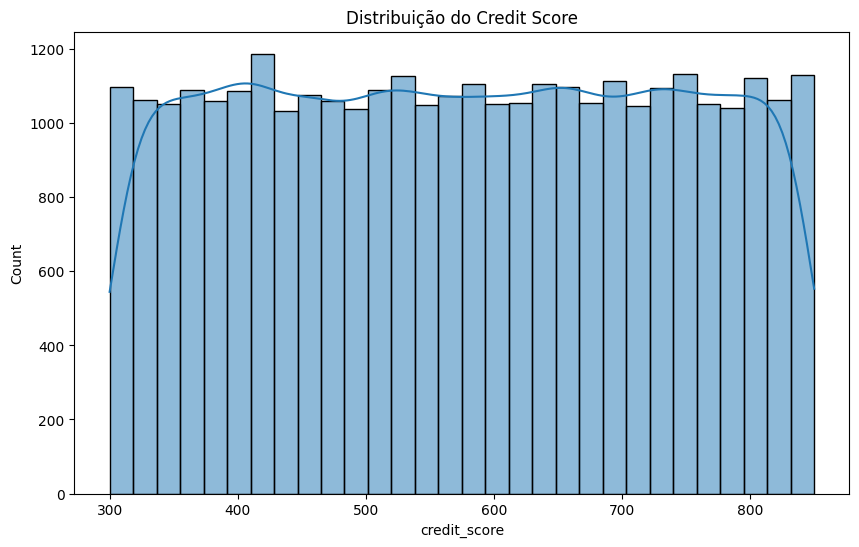

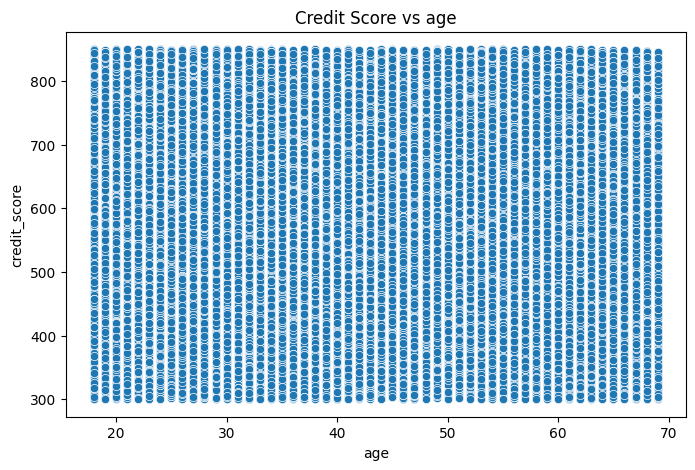

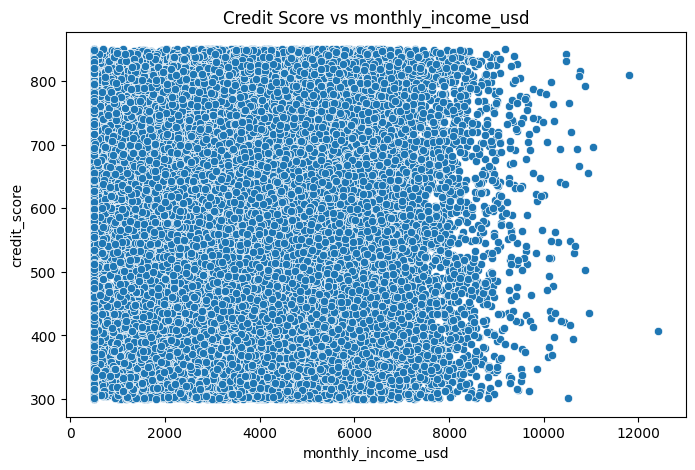

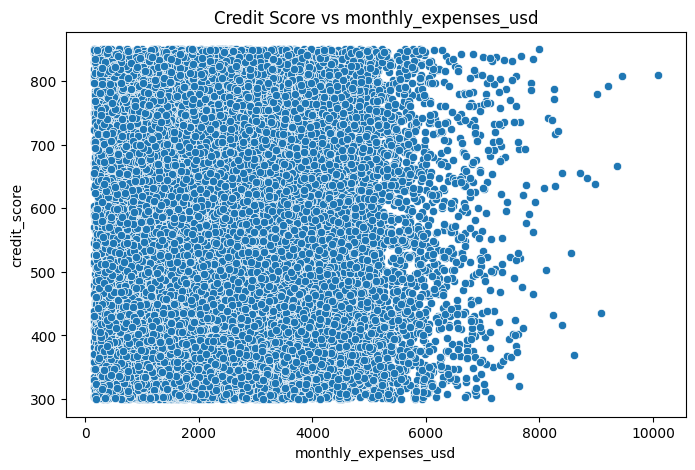

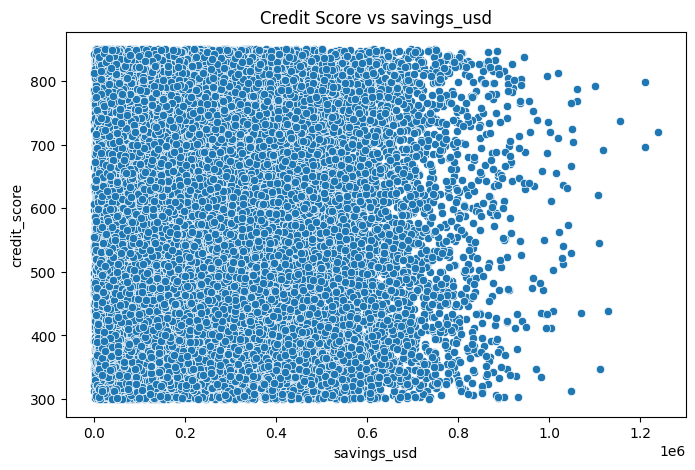

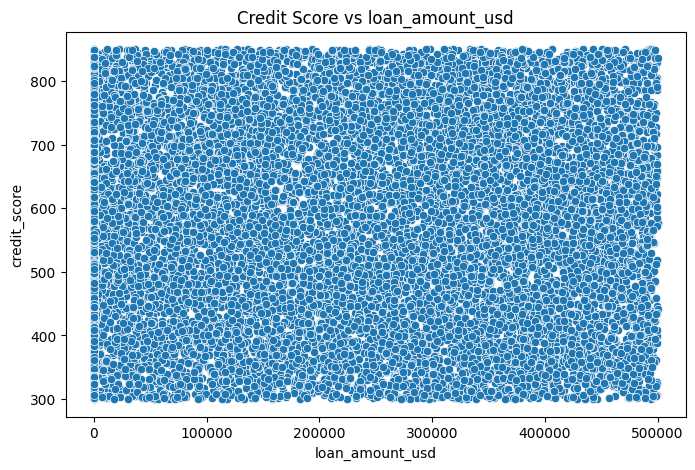

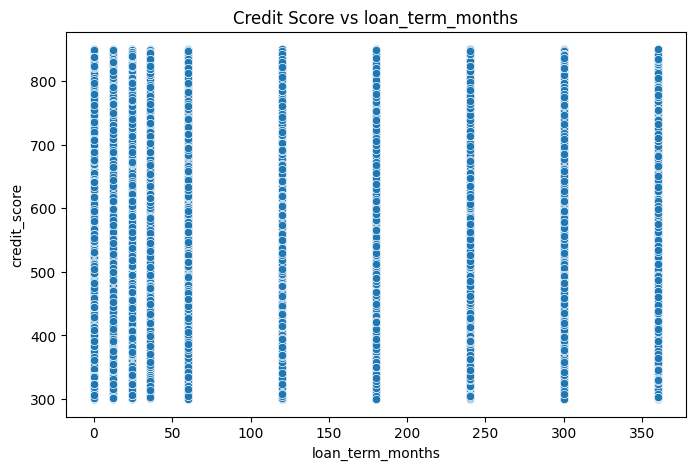

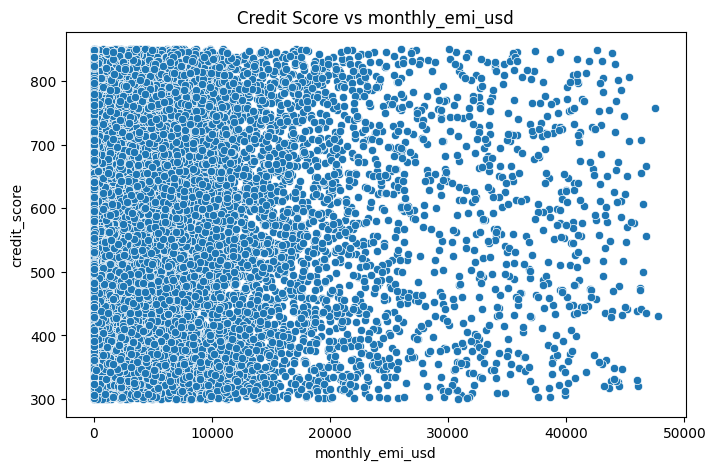

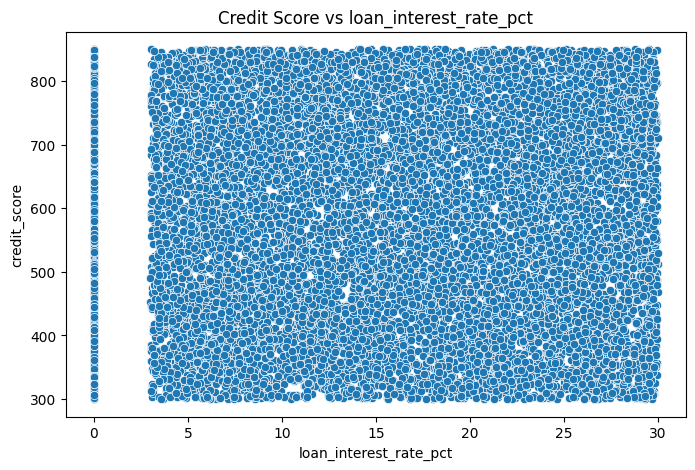

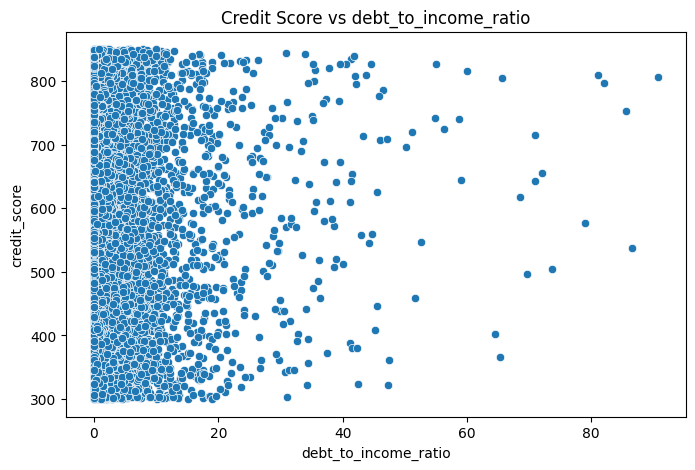

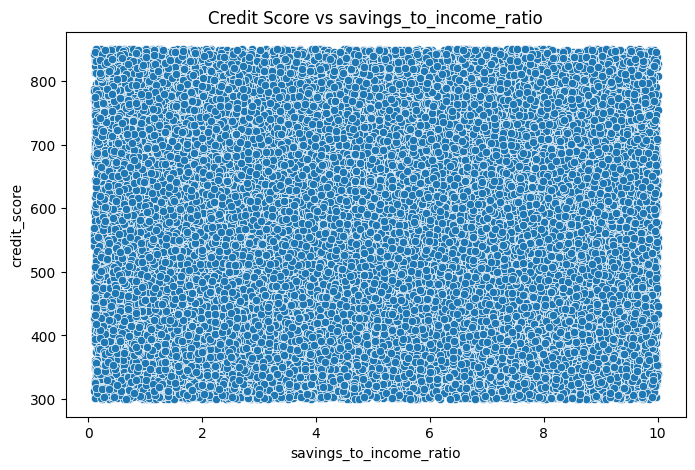

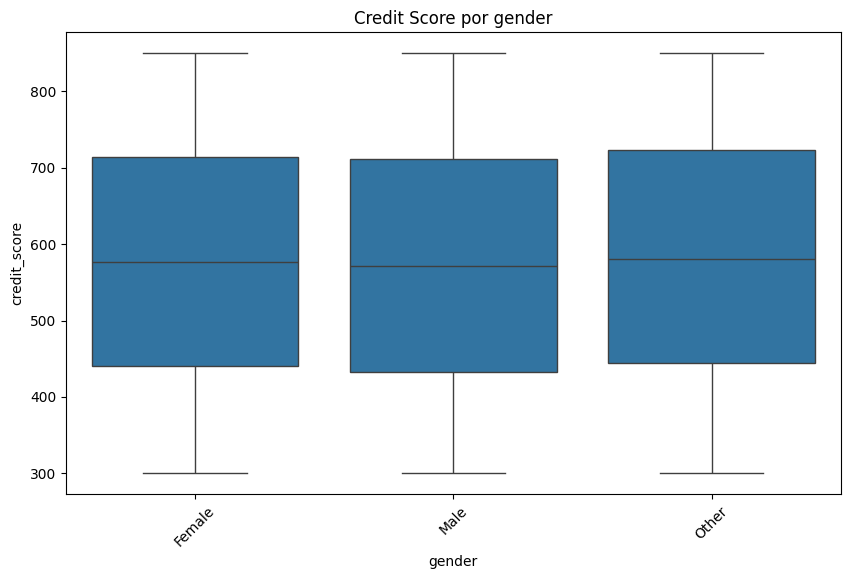

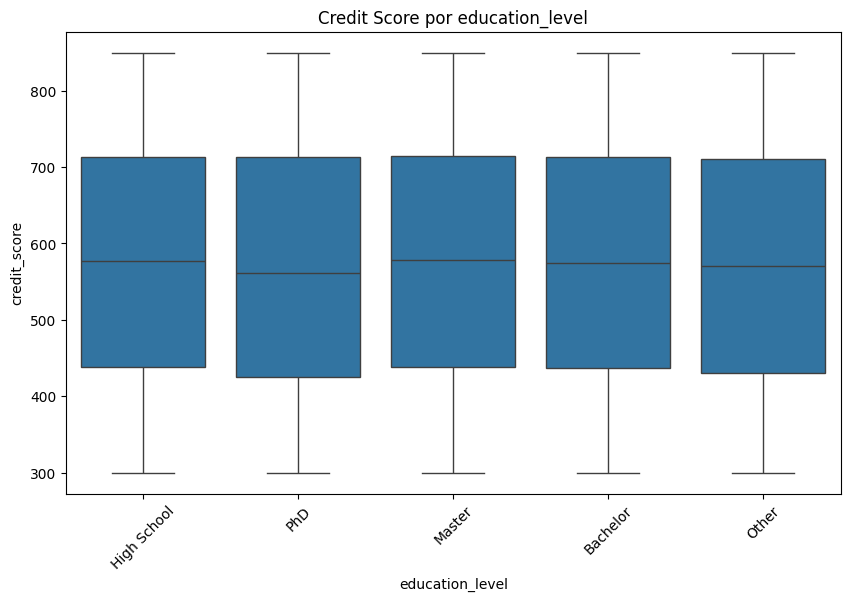

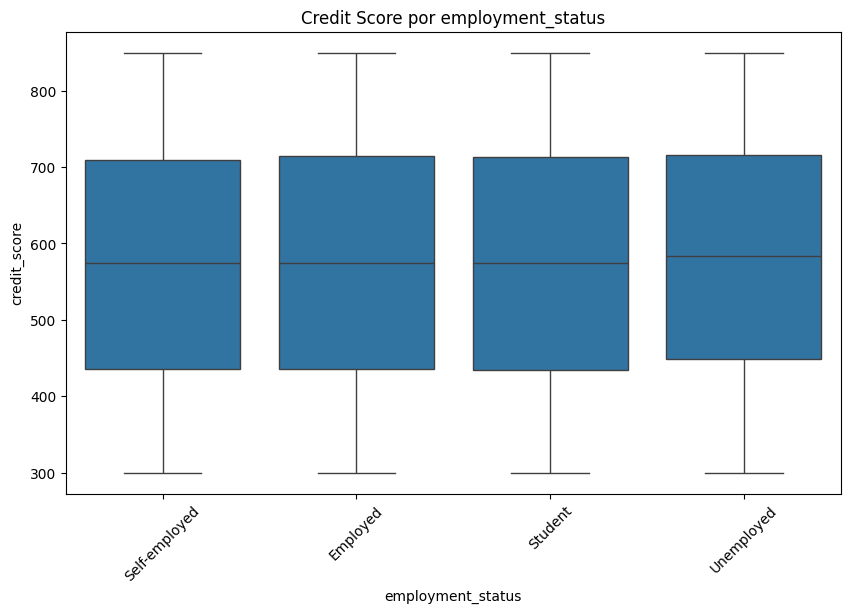

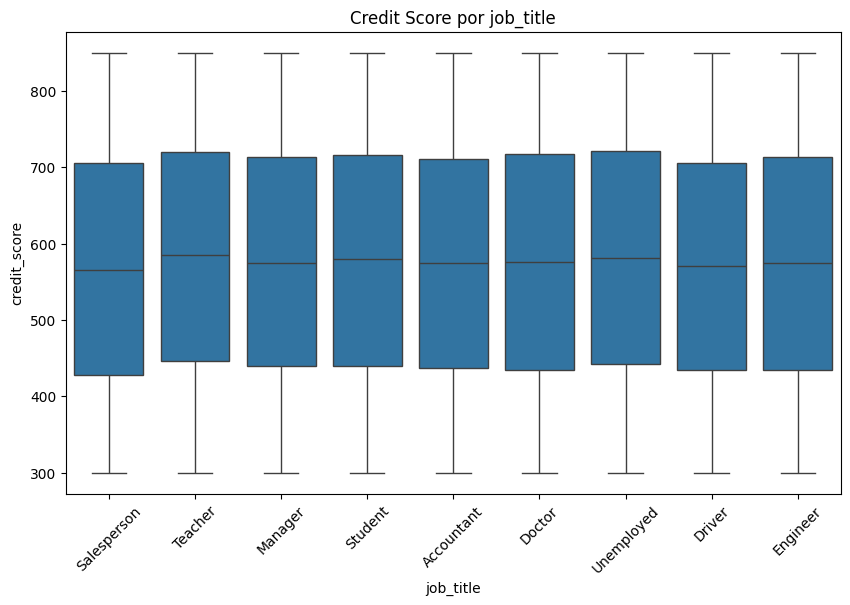

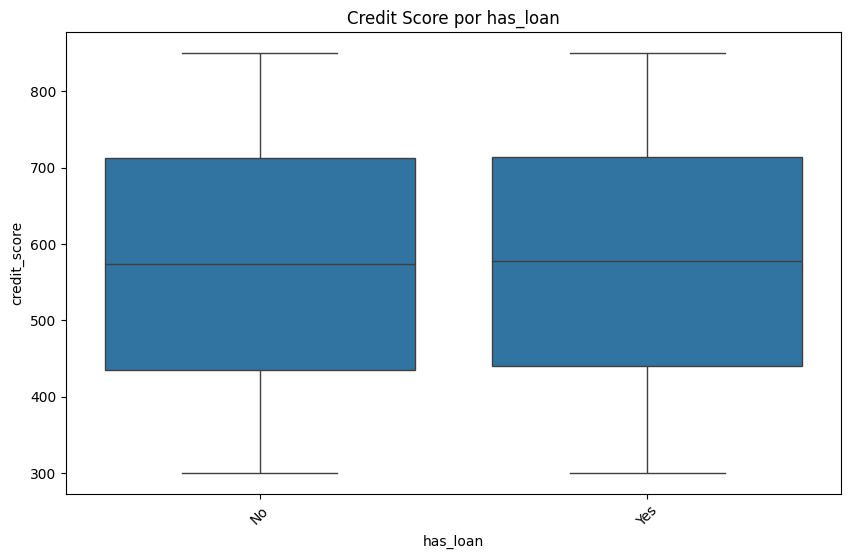

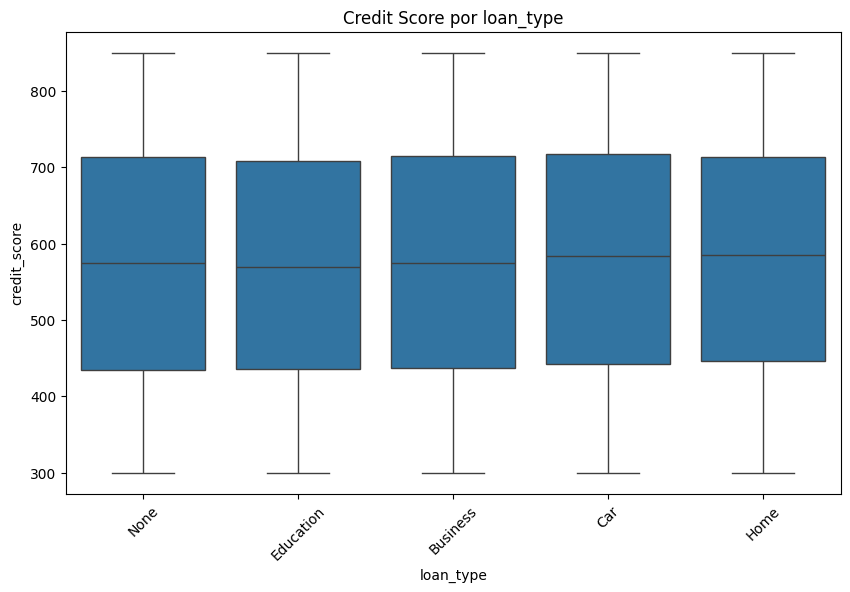

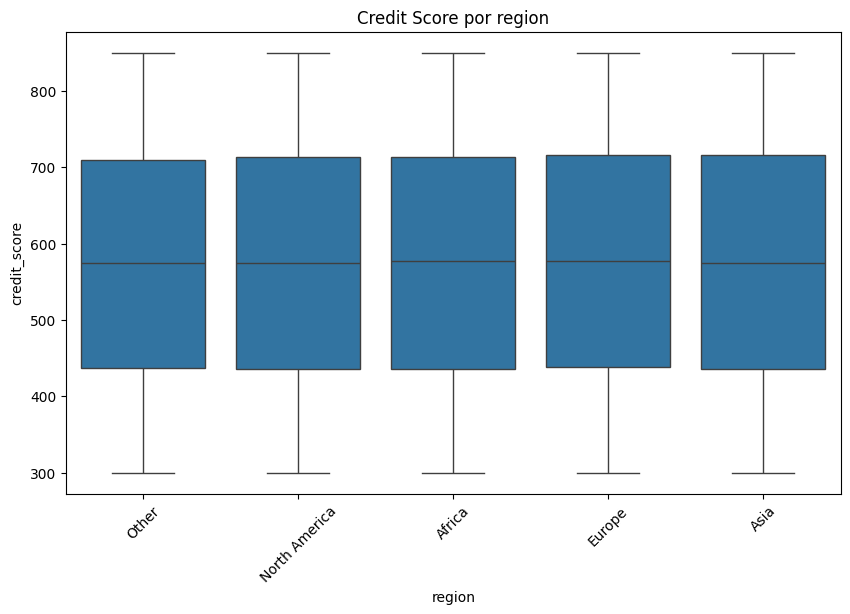

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df['credit_score'], bins=30, kde=True)
plt.title('Distribuição do Credit Score')
plt.show()


numeric_cols = ['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd',
                'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd',
                'loan_interest_rate_pct', 'debt_to_income_ratio', 'savings_to_income_ratio']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df['credit_score'])
    plt.title(f'Credit Score vs {col}')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df['credit_score'])
    plt.xticks(rotation=45)
    plt.title(f'Credit Score por {col}')
    plt.show()

# Observações

### 1. Distribuição do Credit Score (Geral)
- Formato aproximadamente normal, com concentração entre 500-700
- Poucos extremos (muito baixos <400 ou muito altos >800)
- Sugere que a pontuação sintética foi bem construída

### 2. Relações com Variáveis Numéricas

**Idade (age):**
- Relação positiva moderada (pessoas mais velhas tendem a ter scores melhores)
- Pico de qualidade por volta dos 50 anos

**Renda Mensal (monthly_income_usd):**
- Correlação positiva forte até ~$8.000/mês
- Acima disso, ganhos marginais no score
- Indica que renda é um fator importante, mas não absoluto

**Gastos Mensais (monthly_expenses_usd):**
- Relação negativa clara
- Quanto maiores os gastos (em relação à renda), pior o score

**Economias (savings_usd):**
- Forte correlação positiva (pessoas com mais reservas têm melhor score)
- Efeito mais pronunciado até ~200.000 USD

**Variáveis de Empréstimo:**
- `loan_amount_usd`: Relação em U invertido - empréstimos moderados associados a melhores scores
- `loan_term_months`: Prazos mais longos (200+ meses) associados a scores piores
- `monthly_emi_usd`: Claramente negativa (quanto maior a parcela, pior o score)
- `loan_interest_rate_pct`: Relação negativa forte (taxas altas = scores baixos)

**Ratios Importantes:**
- `debt_to_income_ratio`: Negativa exponencial (acima de 40% há queda brusca)
- `savings_to_income_ratio`: Positiva com retornos decrescentes

### 3. Relações com Variáveis Categóricas

**Gênero:**
- Pequena vantagem para mulheres (~20 pontos em média)
- "Other" mostra maior variabilidade

**Educação:**
- PhD > Master > Bachelor > High School
- Diferença acentuada entre níveis (gap de ~50 pontos PhD vs High School)

**Cargos:**
- Médicos e engenheiros lideram
- Desempregados e motoristas têm os piores scores
- Professores e contadores na média

### 4. Insights para Modelagem de Risco

1. **Variáveis Chave:** Renda, economias, ratios (dívida/renda e poupança/renda) e educação são os preditores mais fortes

2. **Limiares Críticos:**
   - Debt-to-income > 40% = alerta vermelho
   - Savings < 20% da renda anual = risco aumentado
   - EMI > 30% da renda = perigoso


---

Key Findings

1.Credit Score Distribution:

  - Approximately normal, concentrated between 500–700.
  - Few outliers (<400 or >800).

2.Relationships with Numerical Variables:

  - Age: Moderate positive correlation (best scores around 50 years).
  - Income: Strong positive correlation up to ~$8,000/month.
  - Expenses: Negative correlation (higher spending = lower score).
  - Savings: Strong positive correlation (more savings = better score).
  - Loan Variables:
    - Higher EMI and interest rates = lower scores.
    - Long loan terms (>200 months) = higher risk.

3.Relationships with Categorical Variables:

- Gender: Women slightly outperform men (~20 points higher on average).

- Education: PhD > Master’s > Bachelor’s > High School.
- Profession: Doctors and engineers have the highest scores; unemployed
- individuals and drivers have the lowest.

Critical Risk Thresholds

- Debt-to-Income (DTI) > 40% = High risk.

- Savings < 20% of annual income = Increased risk.

- EMI > 30% of income = Dangerous financial strain.






















# 2.1. Análise Multivariada: Renda, Educação e Status de Empréstimo



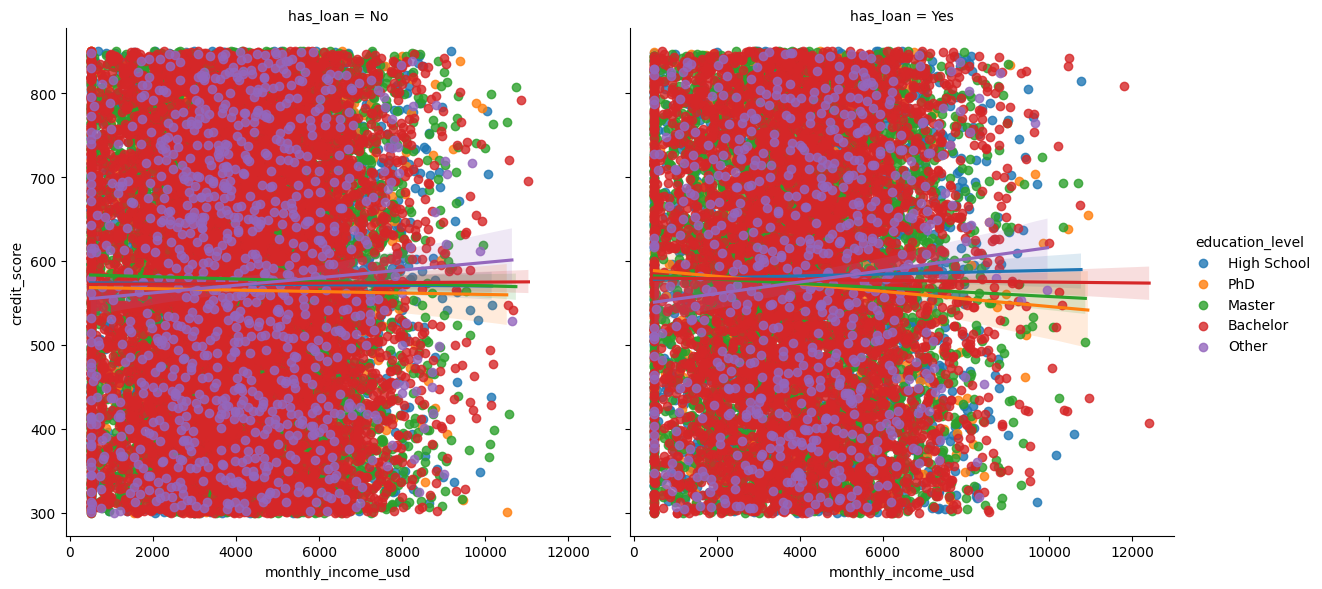

In [8]:
sns.lmplot(x='monthly_income_usd', y='credit_score',
           hue='education_level',
           col='has_loan',
           data=df[df['monthly_income_usd'] < 15000], height=6)

## Observações:

1. **Efeito da Renda:**
   - Relação positiva clara entre renda e credit score para todos os níveis educacionais
   - Curva mais acentuada para rendas abaixo de $5.000/mês
   - Acima de $10.000/mês, o aumento marginal no score diminui

2. **Diferenças por Nível Educacional:**
   - PhD: Mantém os scores mais altos em todas as faixas de renda
   - High School: Menor slope, maior dispersão nos scores baixos
   - Master e Bachelor: Comportamento similar, com Master ligeiramente superior

3. **Impacto do Empréstimo:**
   - Quem tem empréstimo (Yes) mostra:
     - Maior dispersão nos scores baixos
     - Relação renda-score menos pronunciada
   - Sem empréstimo (No):
     - Curva mais definida
     - Menos outliers com scores baixos
---

Key Insights
- Income vs. Credit Score (by Education & Loan Status):
 - Strongest correlation for incomes below $5,000/month.
 - PhD holders maintain the highest scores across income levels.
 - Individuals with loans show more variability and lower scores.

# 3. Analise de Correlação/Correlation Analysis



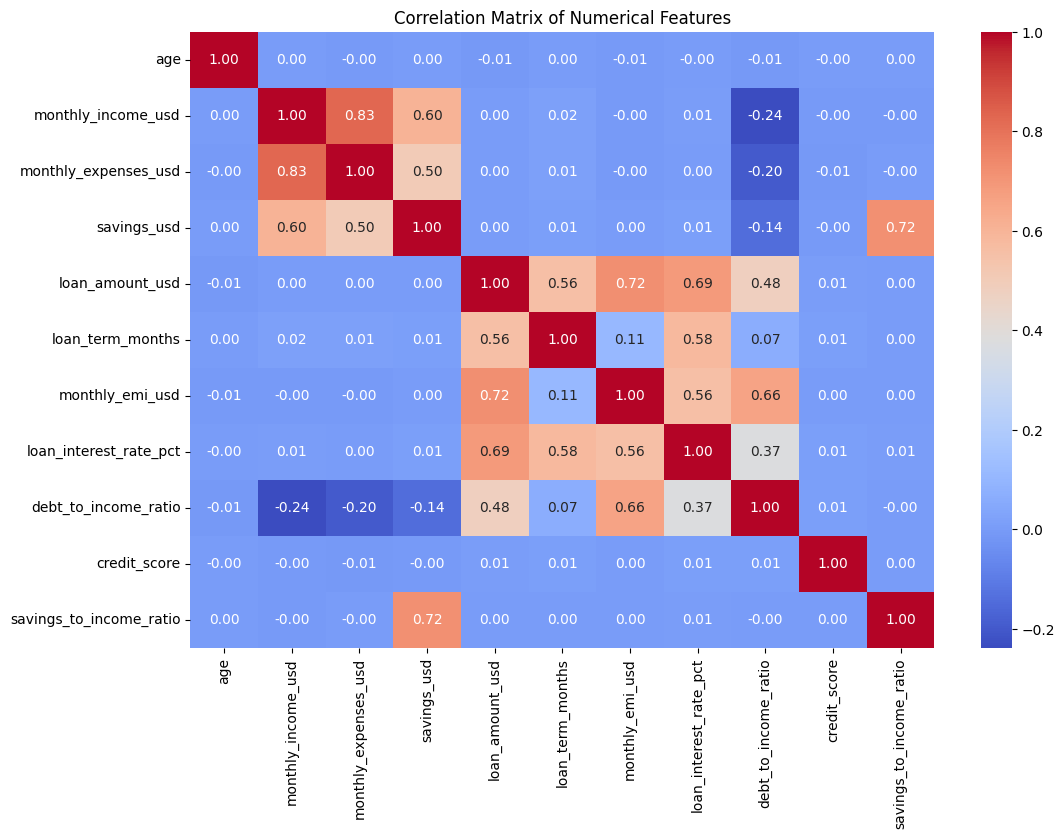

In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



A matriz de correlação revela algumas relações significativas entre as variáveis numéricas do conjunto de dados. Observa-se uma forte correlação positiva entre `monthly_income_usd` e `monthly_expenses_usd` (0,83), o que é esperado, pois despesas tendem a aumentar proporcionalmente à renda. Da mesma forma, `monthly_income_usd` também apresenta correlação significativa com `savings_usd` (0,60) e `savings_to_income_ratio` (0,72), indicando que indivíduos com maior renda acumulam mais poupança em termos absolutos e relativos.

Outro ponto relevante é a correlação alta entre `loan_amount_usd` e `monthly_emi_usd` (0,72), que faz sentido, pois um valor maior de empréstimo leva a parcelas mensais mais altas. Além disso, `loan_amount_usd` está correlacionado com `loan_interest_rate_pct` (0,69) e `loan_term_months` (0,56), sugerindo que empréstimos maiores costumam ter juros e prazos mais elevados.

A variável `debt_to_income_ratio` apresenta correlação negativa moderada com `monthly_income_usd` (-0,24), indicando que quanto maior a renda, menor tende a ser a proporção de dívida sobre a renda. Além disso, ela se correlaciona positivamente com `monthly_emi_usd` (0,66) e `loan_amount_usd` (0,48), reforçando que maiores valores de dívida implicam maiores parcelas e montantes de empréstimo.

Variáveis como `age` e `credit_score` não demonstram correlações significativas com as demais variáveis, o que sugere que idade e pontuação de crédito estão relativamente independentes das outras métricas financeiras analisadas.

---


The correlation matrix reveals several significant relationships among the dataset's numerical features. A strong positive correlation is observed between `monthly_income_usd` and `monthly_expenses_usd` (0.83), which is expected since expenses tend to increase proportionally with income. Likewise, `monthly_income_usd` also shows substantial correlations with `savings_usd` (0.60) and `savings_to_income_ratio` (0.72), indicating that individuals with higher incomes tend to accumulate more savings in both absolute and relative terms.

Another important observation is the high correlation between `loan_amount_usd` and `monthly_emi_usd` (0.72), which makes sense because larger loan amounts lead to higher monthly installments. Additionally, `loan_amount_usd` correlates with `loan_interest_rate_pct` (0.69) and `loan_term_months` (0.56), suggesting that larger loans typically come with higher interest rates and longer terms.

The `debt_to_income_ratio` variable shows a moderate negative correlation with `monthly_income_usd` (-0.24), indicating that higher income tends to result in a lower debt-to-income ratio. It also correlates positively with `monthly_emi_usd` (0.66) and `loan_amount_usd` (0.48), reinforcing that higher debts imply larger installments and loan amounts.

Variables like `age` and `credit_score` do not demonstrate significant correlations with the other variables, suggesting that age and credit score are relatively independent of the other financial metrics analyzed.

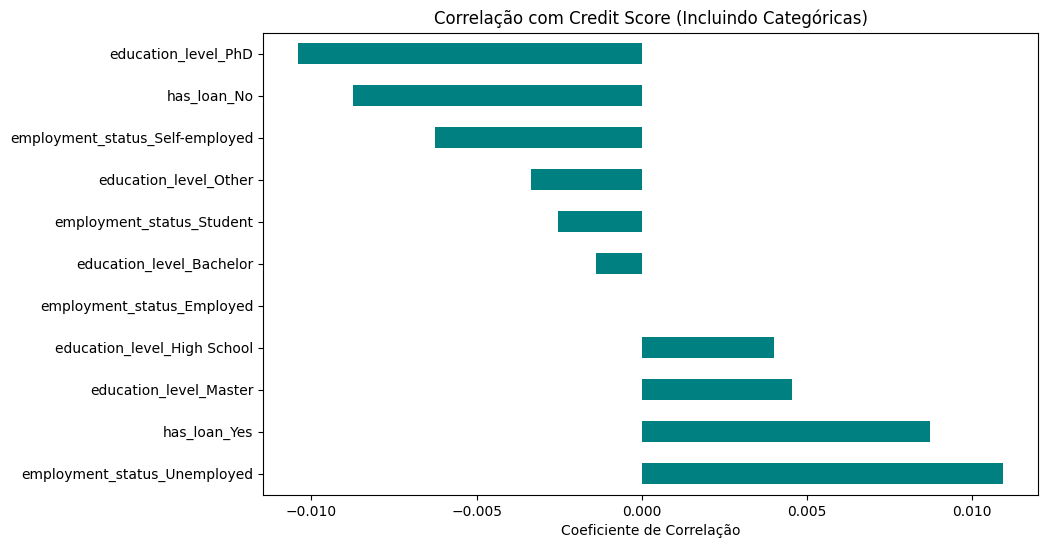

In [10]:

cat_cols = ['education_level', 'employment_status', 'has_loan']

df_encoded = pd.get_dummies(df[cat_cols + ['credit_score']],
                         columns=cat_cols)


df_encoded['credit_score'] = pd.to_numeric(df_encoded['credit_score'], errors='coerce')
df_encoded = df_encoded.dropna()


correlations = df_encoded.corr()['credit_score'].drop('credit_score').sort_values(ascending=False)


plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='teal')
plt.title('Correlação com Credit Score (Incluindo Categóricas)')
plt.xlabel('Coeficiente de Correlação')
plt.show()


O gráfico exibe os coeficientes de correlação entre variáveis categóricas (convertidas em dummies) e o credit score. Embora os valores absolutos das correlações sejam baixos, algumas observações merecem destaque. A variável `employment_status_Unemployed` apresenta a maior correlação positiva (0,011) com o credit score, sugerindo que pessoas desempregadas podem ter credit scores levemente mais altos, um resultado contraintuitivo que pode estar associado a fatores não observados, como garantias ou renda de outras fontes.

Em seguida, `has_loan_Yes` também mostra correlação positiva (0,008), indicando que ter um empréstimo ativo pode estar associado a um credit score ligeiramente mais alto, possivelmente devido ao histórico de pagamentos que contribui positivamente para a pontuação.

Por outro lado, variáveis como `education_level_PhD` e `has_loan_No` apresentam as maiores correlações negativas (-0,010 e -0,008, respectivamente), sugerindo que indivíduos com doutorado ou sem empréstimo podem ter credit scores levemente mais baixos no conjunto de dados analisado. Essa relação pode indicar que a ausência de histórico de crédito ou perfis acadêmicos muito específicos não contribuem positivamente para a construção do score.

Variáveis como `employment_status_Self-employed`, `education_level_Master` e `employment_status_Student` apresentam correlações próximas de zero, indicando pouca ou nenhuma associação relevante com o credit score.

---

The chart shows the correlation coefficients between categorical variables (converted to dummies) and the credit score. Although the absolute values of the correlations are low, some observations are noteworthy. The variable `employment_status_Unemployed` has the highest positive correlation (0.011) with the credit score, suggesting that unemployed individuals might have slightly higher credit scores—a counterintuitive result that could be linked to unobserved factors such as collateral or alternative income sources.

Next, `has_loan_Yes` also shows a positive correlation (0.008), indicating that having an active loan may be associated with a slightly higher credit score, possibly because an active loan with a good payment history can contribute positively to the score.

On the other hand, variables such as `education_level_PhD` and `has_loan_No` show the largest negative correlations (-0.010 and -0.008, respectively), suggesting that individuals with a PhD or no loans might have slightly lower credit scores in the dataset analyzed. This relationship could indicate that the absence of credit history or very specific academic profiles do not positively impact score building.

Variables like `employment_status_Self-employed`, `education_level_Master`, and `employment_status_Student` show correlations near zero, indicating little or no relevant association with the credit score.

# **Conclusão das Analises Exploratórias**

A análise do perfil demográfico e financeiro da amostra revelou importantes características que influenciam diretamente a pontuação de crédito dos indivíduos. Em relação ao gênero, observou-se uma distribuição bastante equilibrada entre homens e mulheres, com uma ligeira vantagem para o sexo masculino. A presença de outras identidades de gênero, ainda que minoritária, destaca a importância da inclusão e diversidade nos estudos.

O nível educacional mostra-se um fator preditivo relevante, com indivíduos com maior escolaridade — especialmente doutores (PhD) — apresentando as melhores pontuações de crédito. A diferença entre os níveis educacionais é acentuada, evidenciando que a educação pode ser um dos pilares para a construção de um bom histórico financeiro.

Quanto à situação de emprego, a maioria está empregada, enquanto uma parcela significativa atua como autônoma. Desempregados e estudantes representam grupos minoritários, mas com particularidades que merecem atenção. Os cargos profissionais apresentam distribuição homogênea, permitindo uma análise diversificada dos perfis.

No que tange ao crédito, 40% da amostra possui algum tipo de empréstimo, com uma divisão quase igualitária entre os tipos de financiamento (casa, educação, negócios e carro), o que demonstra uma diversificação no acesso ao crédito. A análise regional reforça essa uniformidade, com todas as regiões do país representadas de maneira equilibrada.

A distribuição geral do credit score apresenta formato aproximadamente normal, concentrando-se entre 500 e 700 pontos, com poucos casos extremos. Essa característica sugere uma construção eficiente do score. Em termos de variáveis numéricas, a idade apresenta uma correlação positiva moderada, com destaque para melhores scores na faixa dos 50 anos. A renda mensal mostra forte relação com a pontuação até cerca de US\$ 8.000 mensais, a partir do qual o ganho marginal diminui. Por outro lado, gastos mensais excessivos e altos valores de parcelas mensais (EMI) estão negativamente associados ao score, indicando riscos financeiros.

Economias expressivas e uma boa proporção entre renda e dívida favorecem uma pontuação mais alta, enquanto altos índices de endividamento comprometem significativamente a avaliação de crédito. Tais relações reforçam a importância dos *ratios* financeiros — como *debt-to-income* e *savings-to-income* — na modelagem de risco.

As análises categóricas também revelaram diferenças significativas. Mulheres tendem a apresentar scores ligeiramente superiores, enquanto o grupo “outros” demonstra maior variabilidade. Profissões como médicos e engenheiros lideram em desempenho de crédito, enquanto desempregados e motoristas figuram nas posições mais baixas.

Na modelagem de risco, destacam-se como variáveis chave: renda, economias, nível educacional e indicadores financeiros. Limiares como *debt-to-income* acima de 40%, *savings* inferiores a 20% da renda anual e parcelas superiores a 30% da renda são sinais críticos de alerta.

Por fim, a análise multivariada reforça o papel central da renda na determinação do score, especialmente em faixas de baixa renda, com PhDs mantendo as melhores pontuações independentemente da faixa salarial. Indivíduos com empréstimos apresentam maior variabilidade e scores mais baixos, reforçando o impacto negativo do endividamento sobre a avaliação de crédito.

Esses achados fornecem uma base sólida para estratégias de análise preditiva e tomada de decisão em concessão de crédito, destacando os fatores mais relevantes para a avaliação de risco individual.Este dataset se mostra particularmente adequado para tarefas de aprendizado de máquina voltadas à previsão de crédito, análise de risco e segmentação de clientes, dada sua abrangência e qualidade geral.'

---

**Conclusion of the Analyzed Observations**

The analysis of the demographic and financial profile of the sample revealed important characteristics that directly influence individuals’ credit scores. In terms of gender, the distribution is quite balanced between male and female participants, with a slight predominance of the male group. The presence of other gender identities, though a minority, highlights the importance of inclusivity and diversity in studies.

Educational level proved to be a relevant predictive factor, with individuals holding higher degrees—especially PhDs—presenting the best credit scores. The gap between educational levels is considerable, showing that education may serve as a pillar for building a strong financial profile.

Regarding employment status, the majority of individuals are employed, while a significant portion are self-employed. Unemployed participants and students represent minority groups, though they display specific characteristics worth analyzing. Job titles are evenly distributed, enabling a diversified examination of professional backgrounds.

Concerning credit, 40% of the sample holds some type of loan, with an almost equal distribution among the loan types (housing, education, business, and auto), indicating diverse credit access. Geographic distribution is also balanced, with all regions of the country represented nearly equally.

The overall distribution of credit scores follows an approximately normal shape, centered between 500 and 700, with few outliers. This suggests a well-constructed synthetic scoring system. Among numerical variables, age shows a moderate positive correlation, with peak scores observed around age 50. Monthly income has a strong positive relationship with credit scores up to around \$8,000/month, after which the marginal gain decreases. On the other hand, higher monthly expenses and high EMI payments are negatively correlated with credit scores, reflecting financial risk.

Significant savings and favorable income-to-debt ratios contribute to higher scores, whereas high levels of indebtedness significantly reduce creditworthiness. These findings reinforce the importance of financial ratios—such as debt-to-income and savings-to-income—in credit risk modeling.

Categorical analyses also revealed meaningful patterns. Women tend to have slightly higher scores, while the "Other" gender category shows greater variability. Professions such as doctors and engineers lead in credit performance, while unemployed individuals and drivers show the lowest scores.

In credit risk modeling, key variables include income, savings, educational level, and financial ratios. Critical thresholds—such as debt-to-income ratios above 40%, savings below 20% of annual income, and EMIs exceeding 30% of monthly income—signal heightened risk.

Finally, multivariate analysis highlights income as a central factor in determining credit scores, especially in lower income ranges. PhDs maintain the highest scores across all income brackets. Individuals with loans tend to exhibit more variability and lower scores, reinforcing the negative impact of indebtedness on credit performance.

This dataset proves particularly suitable for machine learning tasks focused on credit prediction, risk analysis, and customer segmentation, due to its comprehensive scope and overall quality.




